In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Restaurant_Reviews.tsv', delimiter = '\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1000)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier1 = MultinomialNB(alpha=0.2)
classifier1.fit(X_train, y_train)
# Predicting the Test set results
y_pred1 = classifier1.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test, y_pred1)
print ("Accuracy:",acc1)

Accuracy: 0.7766666666666666


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred1)
print ("Confusion Matrix:\n",cm1)

Confusion Matrix:
 [[119  33]
 [ 34 114]]


In [ ]:
from sklearn.metrics import classification_report
cr1= classification_report(y_test,y_pred1)
print(cr1)
print('Accuracy:',acc1)

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       152
           1       0.78      0.77      0.77       148

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300

Accuracy: 0.7766666666666666


In [ ]:
from sklearn.naive_bayes import BernoulliNB
classifier2 = BernoulliNB(alpha=0.2)
classifier2.fit(X_train, y_train)

# Predicting the Test set results
y_pred2 = classifier2.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc2 = accuracy_score(y_test, y_pred2)
print ("Accuracy:",acc2)

Accuracy: 0.77


In [ ]:
from sklearn.metrics import confusion_matrix
cm2= confusion_matrix(y_test, y_pred2)
print ("Confusion Matrix:\n",cm2)

Confusion Matrix:
 [[117  35]
 [ 34 114]]


In [ ]:
from sklearn.metrics import classification_report
cr2= classification_report(y_test,y_pred2)
print(cr2)

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       152
           1       0.77      0.77      0.77       148

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier3 = GaussianNB()
classifier3.fit(X_train, y_train)
# Predicting the Test set results
y_pred3 = classifier3.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc3 = accuracy_score(y_test, y_pred3)
print ("Accuracy:",acc3)

Accuracy: 0.69


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier4 = RandomForestClassifier(n_estimators = 1500,criterion = 'gini')
classifier4.fit(X_train, y_train)
y_pred4 = classifier4.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc4 = accuracy_score(y_test, y_pred4)
print ("Accuracy:",acc4)

Accuracy: 0.7733333333333333


In [ ]:
from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(y_test, y_pred4)
print ("Confusion Matrix:\n",cm4)

Confusion Matrix:
 [[127  25]
 [ 43 105]]


In [ ]:
from sklearn.metrics import classification_report
cr4= classification_report(y_test,y_pred4)
print(cr4)

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       152
           1       0.81      0.71      0.76       148

    accuracy                           0.77       300
   macro avg       0.78      0.77      0.77       300
weighted avg       0.78      0.77      0.77       300



In [ ]:
from sklearn.linear_model import LogisticRegression
classifier5=LogisticRegression()
classifier5.fit(X_train, y_train)
y_pred5=classifier5.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc5 = accuracy_score(y_test, y_pred5)
print ("Accuracy:",acc5)

Accuracy: 0.7633333333333333


In [ ]:
from sklearn.metrics import confusion_matrix
cm5 = confusion_matrix(y_test, y_pred5)
print ("Confusion Matrix:\n",cm5)

Confusion Matrix:
 [[124  28]
 [ 43 105]]


In [ ]:
from sklearn.metrics import classification_report
cr5= classification_report(y_test,y_pred5)
print(cr5)

              precision    recall  f1-score   support

           0       0.74      0.82      0.78       152
           1       0.79      0.71      0.75       148

    accuracy                           0.76       300
   macro avg       0.77      0.76      0.76       300
weighted avg       0.77      0.76      0.76       300



In [ ]:
results = pd.DataFrame({
    'Model': ['MultinomialNB','BernoulliNB','GaussianNB','RandomForestClassifier'],
    'Score': [acc1*100 , acc2*100 ,acc3*100 , acc4*100]})

result_df = results.sort_values(by='Score', ascending=False)
result_df

,Model,Score
0,MultinomialNB,77.666667
3,RandomForestClassifier,77.333333
1,BernoulliNB,77.000000
2,GaussianNB,69.000000


In [ ]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Model   4 non-null      object 
 1   Score   4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 96.0+ bytes


<Axes: xlabel='Model'>

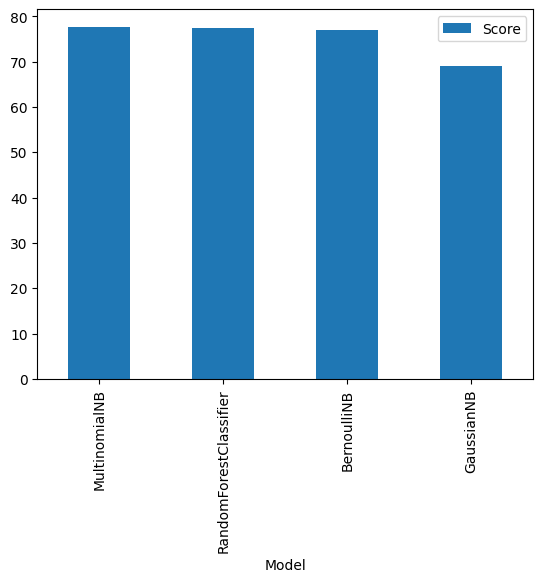

In [ ]:
result_df.plot.bar(x='Model',y='Score')